# 3D Convolutions
- this notebook shows a simple usage on 3D convolutions as well as running .py scripts in a jupyter notebook
- https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-run

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Check the 3D data

In [2]:
# Load data
df = np.load("modelnet20.npz")
data = {}

for data_name in ["train", "dev", "test"]:
    tmp = dict((key[len(data_name) + 1:], df[key]) for key in df if key.startswith(data_name))
    data[data_name] = tmp

In [3]:
# Check the shape of the voxels
data['train']['voxels'][0].shape

(20, 20, 20, 1)

In [4]:
# Check the values of the voxels
np.unique(data['train']['voxels'][0])

array([0, 1], dtype=uint8)

In [5]:
# Check the classes
np.unique(data['train']['labels'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

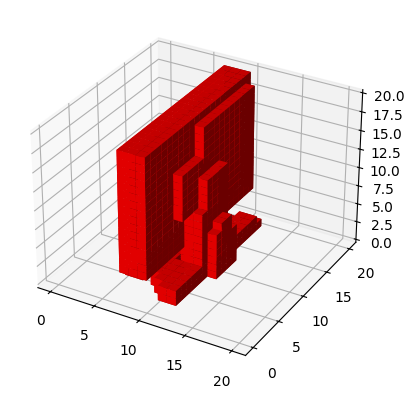

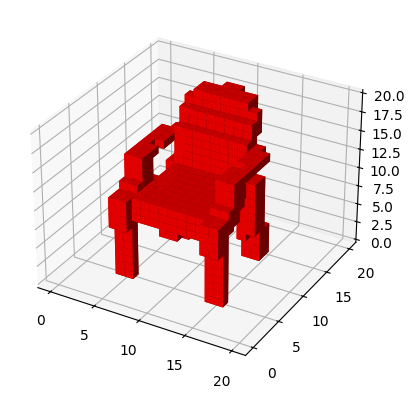

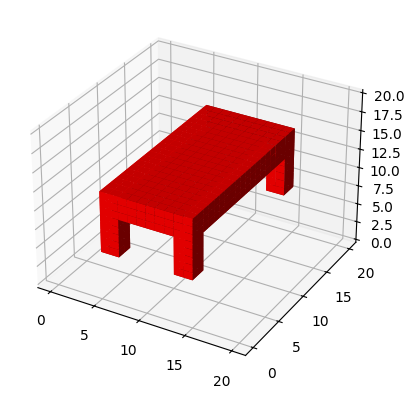

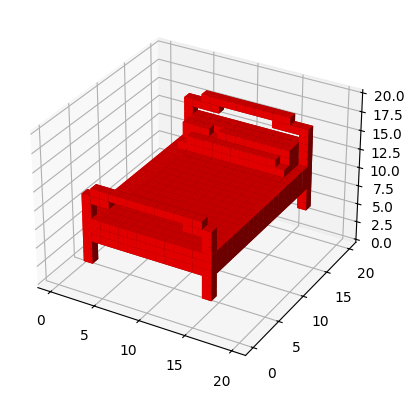

In [6]:
for i in [79, 78, 80, 83]:
    obj = data['train']['voxels'][i][:, :, :, 0]
    obj = np.transpose(obj, (2, 1, 0))
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.voxels(obj, facecolors='red')
    plt.show()

### Run various specifications of the model

 
- C-filters-kernel_size-stride-padding: Add a convolutional layer with ReLU activation and specified number of filters, kernel size, stride and padding. Example: C-10-3-1-same
- CB-filters-kernel_size-stride-padding: Same as C-filters-kernel_size-stride-padding, but use batch normalization. In detail, start with a convolutional layer without bias and activation, then add batch normalization layer, and finally ReLU activation. Example: CB-10-3-1-same
- M-pool_size-stride: Add max pooling with specified size and stride, using the default "valid" padding. Example: M-3-2
- R-[layers]: Add a residual connection. The layers contain a specification of at least one convolutional layer (but not a recursive residual connection R). The input to the R layer should be processed sequentially by layers, and the produced output (after the ReLU nonlinearty of the last layer) should be added to the input (of this R layer). Example: R-[C-16-3-1-same,C-16-3-1-same]
- F: Flatten inputs. Must appear exactly once in the architecture.
- H-hidden_layer_size: Add a dense layer with ReLU activation and specified size. Example: H-100
- D-dropout_rate: Apply dropout with the given dropout rate. Example: D-0.5

TLDR:
 
 - layer_type:filters:kernel_size:strides:padding
 - example: C:16:3:2:same

In [7]:
%run 3D_script.py \
--cnn=CB:16:3:2:same,M:3:2,F,H:100 \
--epochs=10 --batch_size=64

Epoch 1/10
59/59 [==============================] - 18s 304ms/step - loss: 1.3080 - accuracy: 0.6842 - val_loss: 1.7881 - val_accuracy: 0.7582
Epoch 2/10
59/59 [==============================] - 15s 251ms/step - loss: 0.6502 - accuracy: 0.8757 - val_loss: 1.5864 - val_accuracy: 0.7985
Epoch 3/10
59/59 [==============================] - 16s 269ms/step - loss: 0.5656 - accuracy: 0.9099 - val_loss: 1.3852 - val_accuracy: 0.8168
Epoch 4/10
59/59 [==============================] - 14s 237ms/step - loss: 0.5245 - accuracy: 0.9260 - val_loss: 1.1469 - val_accuracy: 0.8205
Epoch 5/10
59/59 [==============================] - 14s 236ms/step - loss: 0.4959 - accuracy: 0.9379 - val_loss: 0.9162 - val_accuracy: 0.8571
Epoch 6/10
59/59 [==============================] - 14s 239ms/step - loss: 0.4715 - accuracy: 0.9481 - val_loss: 0.7272 - val_accuracy: 0.8755
Epoch 7/10
59/59 [==============================] - 14s 242ms/step - loss: 0.4522 - accuracy: 0.9567 - val_loss: 0.5777 - val_accuracy: 0.8864

In [ ]:
%run 3D_script.py \
--cnn=CB:16:3:1:same,M:3:2,CB:16:3:1:same,M:3:2,D:0.5,F,H:50 \
--epochs=5 --batch_size=64

In [ ]:
%run 3D_script.py \
--cnn=C:16:3:1:same,M:3:2,C:16:3:1:same,M:3:2,D:0.5,F,H:50 \
--epochs=1 --batch_size=64

In [ ]:
%run 3D_script.py \
--cnn=C:16:3:1:same,M:3:2,C:16:3:1:same,M:3:2,D:0.5,F,H:50 \
--epochs=1 --batch_size=64

In [ ]:
%run 3D_script.py \
--cnn=C:16:3:1:same,M:3:2,C:16:3:1:same,M:3:2,D:0.5,F,H:50 \
--epochs=1 --batch_size=64

In [ ]:
%run 3D_script.py \
--cnn=C:16:3:1:same,M:3:2,C:16:3:1:same,M:3:2,D:0.5,F,H:50 \
--epochs=1 --batch_size=64

<span style="color:red">**TO DO:** Try you own configurations</span>
 - compare peformance of the same model with and without Batch Normalization
 - compare perfomance of the same model with and without Dropout on the last layer
 - compare performance of the same model with and without the data augmentation 